In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
syn_da_mean = np.load('real_da_all_mean_v2.npy')
syn_da_all = np.load('real_da_simulations_all_v2.npy')
syn_obs = np.load('real_observation_v2.npy')
syn_open_mean = np.load('real_bare_cfe_all_v2.npy')

In [3]:
###############Calculate quantiles

da_quantile_5 = np.percentile(syn_da_all, 5, axis=1)
da_quantile_95 = np.percentile(syn_da_all, 95, axis=1)


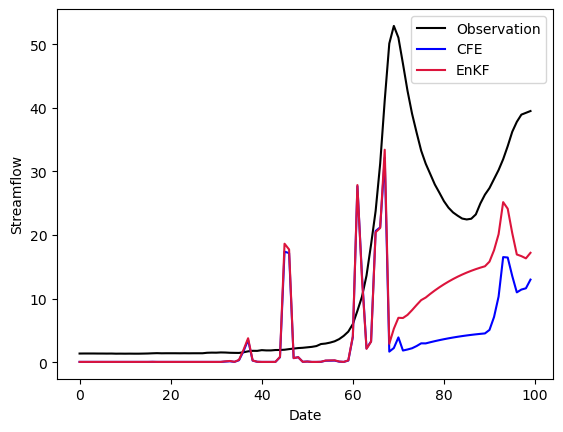

In [16]:
plt.close()
#plt.plot(da_quantile_5[1500:1600], color='blue', label='EnKF Q5', linestyle='-.')
#plt.plot(da_quantile_95[1500:1600], color='blue', label='EnKF Q95', linestyle='-.')




#plt.fill_between(range(len(da_quantile_95[1500:1600])), da_quantile_5[1500:1600], da_quantile_95[1500:1600], color='blue', alpha=0.3)

plt.plot(syn_obs[1500:1600], color='black', label='Observation')
plt.plot(syn_open_mean[1500:1600], color='blue', label='CFE')
plt.plot(syn_da_mean[1500:1600], color='crimson', label='EnKF')



plt.xlabel("Date")
plt.ylabel("Streamflow")
plt.legend()

#Save the plot as an image file

#import matplotlib
#plt.savefig('quantiles_q.tif', backend='Agg')

In [ ]:

open_states = np.load('syn_ostate_variables_all_mean.npy')
obs_states = np.load('syn_state_sm_all.npy')
da_states = np.load('syn_state_variables_all_mean.npy')

In [ ]:

plt.plot(open_states[1:], color='red', label='States with no DA', linestyle='--')
plt.plot(obs_states[1:], color='black', label='Observed states', linestyle='--')
plt.plot(da_states[1:], color='blue', label='States with EnKF', linestyle='-.')
plt.xlabel("Date")
plt.ylabel("Streamflow")

plt.legend()

# Text to be added to the figure
text = """
KGE with EnKF: 0.91
KGE with no DA: 0.86

NSE with EnKF: 0.97
NSE with no DA: 0.88

RMSE with EnKF: 0.27
RMSE with no EnKF: 0.76
"""

# Add the text to the figure
plt.text(0.62, 0.47, text, transform=plt.gcf().transFigure, fontsize=8)

# Display the figure
plt.show()


In [ ]:

# Create a 1x2 grid of plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# First figure
axs[0].plot(open_quantile_95, color='crimson', label='no DA Q95', linestyle='--')
axs[0].plot(open_quantile_5, color='crimson', label='no DA Q5', linestyle='--')
axs[0].plot(da_quantile_5, color='blue', label='EnKF Q5', linestyle='-.')
axs[0].plot(da_quantile_95, color='blue', label='EnKF Q95', linestyle='-.')

axs[0].fill_between(range(len(open_quantile_95)), open_quantile_5, open_quantile_95, color='pink', alpha=0.3)
axs[0].fill_between(range(len(da_quantile_95)), da_quantile_5, da_quantile_95, color='blue', alpha=0.1)

axs[0].plot(syn_obs, color='green', label='Observation')

axs[0].set_xlabel("Date")
axs[0].set_ylabel("Streamflow")
axs[0].legend()

# Second figure
axs[1].plot(open_states[1:], color='crimson', label='States with no DA', linestyle='--')
axs[1].plot(obs_states[1:], color='green', label='Observed states')
axs[1].plot(da_states[1:], color='blue', label='States with EnKF', linestyle=':')
axs[1].set_xlabel("Date")
axs[1].set_ylabel("Soil moisture storage")
axs[1].legend()

# Text to be added to the figure
#text = """
#KGE with EnKF: 0.91
#KGE with no DA: 0.86

#NSE with EnKF: 0.97
#NSE with no DA: 0.88

#RMSE with EnKF: 0.27
#RMSE with no EnKF: 0.76
#"""

# Add the text to the figure
#fig.text(0.36, 0.42, text, fontsize=8)

# Display the figure


import matplotlib
#plt.savefig('final_fig_first.png', backend='Agg')
#plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [ ]:
import matplotlib.pyplot as plt

# Data
kge_da = 0.9122302640388866
kge_ol = 0.8791103862362097

nse_da = 0.9865761853122598
nse_ol = 0.8873632547246301

rmse_da = 0.26533932944227684
rmse_ol = 0.7686058745726125

# Categories
categories = ['EnKF', 'No DA']

# Values for KGE
kge_values = [kge_da, kge_ol]

# Values for NSE
nse_values = [nse_da, nse_ol]

# Values for RMSE
rmse_values = [rmse_da, rmse_ol]

# Set up the figure with a smaller size
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))  # Adjust the figsize here

# Plotting KGE
bars_kge = axes[0].bar(categories, kge_values, color=['blue', 'crimson'])
axes[0].set_title('Kling-Gupta Efficiency (KGE)')
axes[0].set_ylim(0, 1)

for bar in bars_kge:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)  # Adjust fontsize

# Plotting NSE
bars_nse = axes[1].bar(categories, nse_values, color=['blue', 'crimson'])
axes[1].set_title('Nash-Sutcliffe Efficiency (NSE)')
axes[1].set_ylim(0, 1)

for bar in bars_nse:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)  # Adjust fontsize

# Plotting RMSE
bars_rmse = axes[2].bar(categories, rmse_values, color=['blue', 'crimson'])
axes[2].set_title('Root Mean Squared Error (RMSE)')

for bar in bars_rmse:
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)  # Adjust fontsize

# Adjust layout to prevent overlap
plt.tight_layout()


import matplotlib
plt.savefig('final_fig_second.png', backend='Agg')
plt.show()


# Display the plots
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os


In [ ]:
import os

def generate_ensemble_gif(ensemble1, ensemble2, observation_value, gif_filename):
    # Set up the figure and axis for plotting
    fig, ax = plt.subplots(figsize=(8, 6))

    # Define the number of frames (equal to the number of ensemble members)
    num_frames = len(ensemble1)

    # Plot the observed value in the middle
    ax.plot(observation_value, 0, marker='o', markersize=10, color='red', label='Observed Value')

    # Set plot limits and labels
    ax.set_xlim(-10, 10)
    ax.set_ylim(-num_frames-1, num_frames+1)
    ax.set_xlabel('Value')
    ax.set_ylabel('Time Step')

    # Add a legend to the plot
    ax.legend(loc='upper right')

    # Save the plot as an image and add it to the list for creating the GIF
    images = []
    for i in range(num_frames):
        # Plot the ensemble members from ensemble1 and ensemble2
        ax.plot(ensemble1[i], i+1, 'o', markersize=5, color='blue', alpha=0.5, label='Ensemble 1')
        ax.plot(ensemble2[i], -i-1, 'o', markersize=5, color='green', alpha=0.5, label='Ensemble 2')

        plt.title(f'Time Step {i+1}')
        plt.tight_layout()
        image_filename = f'temp_frame_{i}.png'
        plt.savefig(image_filename)
        images.append(imageio.imread(image_filename))
        plt.clf()

    # Create the GIF from the list of images
    imageio.mimsave(gif_filename, images, duration=1)  # Use 'duration' instead of 'fps'

    # Clean up temporary image files
    for i in range(num_frames):
        image_filename = f'temp_frame_{i}.png'
        os.remove(image_filename)

    plt.close()


In [ ]:
ensemble1 = np.load('syn_da_simulations_all.npy')[1,:]
ensemble2 = np.load('syn_open_loop_simulations.npy')[1,:]
generate_ensemble_gif(ensemble1, ensemble2, observation_value=0.27, gif_filename='ensemble_animation.gif')


In [ ]:
#np.mean(ensemble1)